In [1]:
from samana.Data.mg0414 import MG014_MIRI
from samana.Model.mg0414_model import MG0414ModelEPLM3M4Shear
import numpy as np
import matplotlib.pyplot as plt
from lenstronomy.Workflow.fitting_sequence import FittingSequence
import h5py

In [2]:
data = MG014_MIRI()
data.mask_quasar_image_for_reconstruction(True)
model = MG0414ModelEPLM3M4Shear(data, shapelets_order=None)
kwargs_lens_macro_init = None
kwargs_model, _, _, _, _ = model.setup_kwargs_model(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_params = model.kwargs_params(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_likelihood = model.kwargs_likelihood
fitting_sequence = FittingSequence(data.kwargs_data_joint, kwargs_model, model.kwargs_constraints, 
                                  kwargs_likelihood, kwargs_params)

nthreads = 8
psf_symmetry = 1
fitting_kwargs_list = [
        ['update_settings', {'lens_add_fixed': [[0, ['a4_a', 'a3_a','a1_a','delta_phi_m1', 'delta_phi_m3','delta_phi_m4'], [0.0, 0.0, 0.0,0.0, 0.0, 0.0]]]}],
        #['update_settings', {'lens_add_fixed': [[2, ['theta_E'], [0.0]]]}],
        ['PSO', {'sigma_scale': 1., 'n_particles': 10, 'n_iterations': 100, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': psf_symmetry, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 50, 'threadCount': nthreads}],
    #['psf_iteration', {'psf_symmetry': psf_symmetry, 'keep_psf_error_map': True, 'num_iter': 25}],
    #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 50, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 4, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 50, 'threadCount': nthreads}],
        #['MCMC', {'n_burn': 50, 'n_run': 25, 'walkerRatio': 4, 'sigma_scale': 0.1, 'threadCount': nthreads}]
                          ]
chain_list = fitting_sequence.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_sequence.best_fit()

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


Computing the PSO ...


  0%|                                                                                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
  5%|████████████                                                                                                                                                                                                                                    | 5/100 [00:01<00:19,  4.90it/s]/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/Profiles/epl.py:300: RuntimeWarning: invalid value encountered in power
  alpha = 2 / (1 + q) * (b / R) ** t * R_o

Max iteration reached! Stopping.
-1.404323309036596 reduced X^2 of best position
-735.1632522806581 log likelihood
1047 effective number of data points
[{'theta_E': 1.165745089618974, 'gamma': 1.976210320156635, 'e1': 0.289161189436265, 'e2': 0.12716391346371525, 'center_x': -0.26007288904511977, 'center_y': -0.16468161922011704, 'a1_a': 0.0, 'delta_phi_m1': 0.0, 'a3_a': 0.0, 'delta_phi_m3': 0.0, 'a4_a': 0.0, 'delta_phi_m4': 0.0}, {'gamma1': 0.01676647256644915, 'gamma2': -0.0042091293300378415, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.12697861568484978, 'center_x': -0.45772316773287325, 'center_y': 1.4161648646028695}] lens result
[{'amp': 1, 'R_sersic': 0.030974698841990073, 'n_sersic': 4.556154434566755, 'e1': 0.0896431537593779, 'e2': -0.316542793319995, 'center_x': -0.07680656907992223, 'center_y': 0.0762794036481657}] source result
[{'amp': 1, 'R_sersic': 0.5714828172720521, 'n_sersic': 4.29638386285579, 'e1': 0.4446558663205183, 'e2': 0.007933753785177439, 'center_x': -0.219626

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)


-1.3435308526294862 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.3435308526294862
(24, ['gamma_lens0', 'gamma1_lens1', 'gamma2_lens1', 'theta_E_lens2', 'center_x_lens2', 'center_y_lens2', 'R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'R_sersic_lens_light0', 'n_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_y_image', 'delta_y_image', 'delta_y_image', 'delta_y_image'])


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:161: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


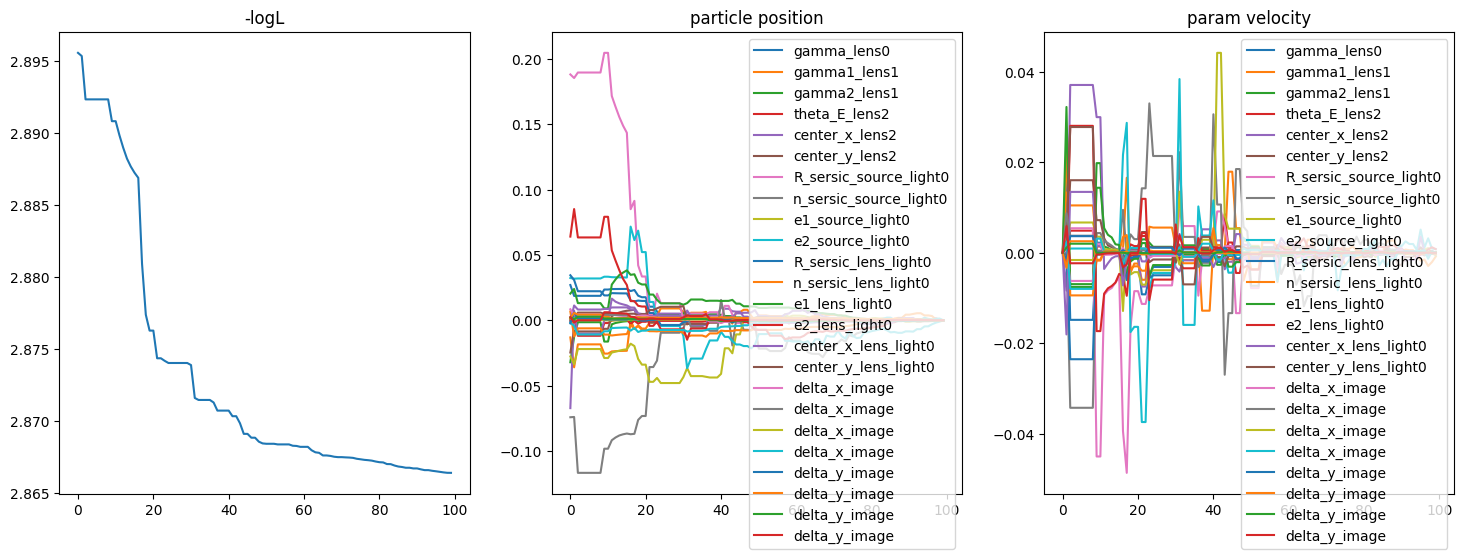

<Figure size 640x480 with 0 Axes>

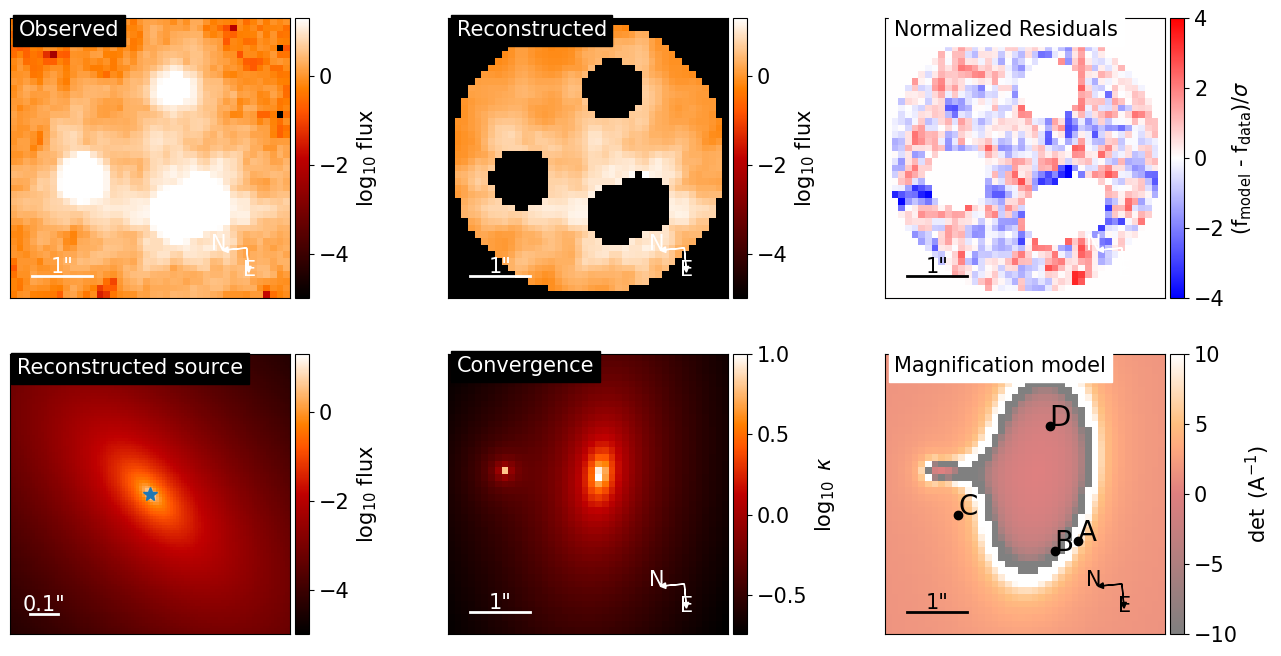

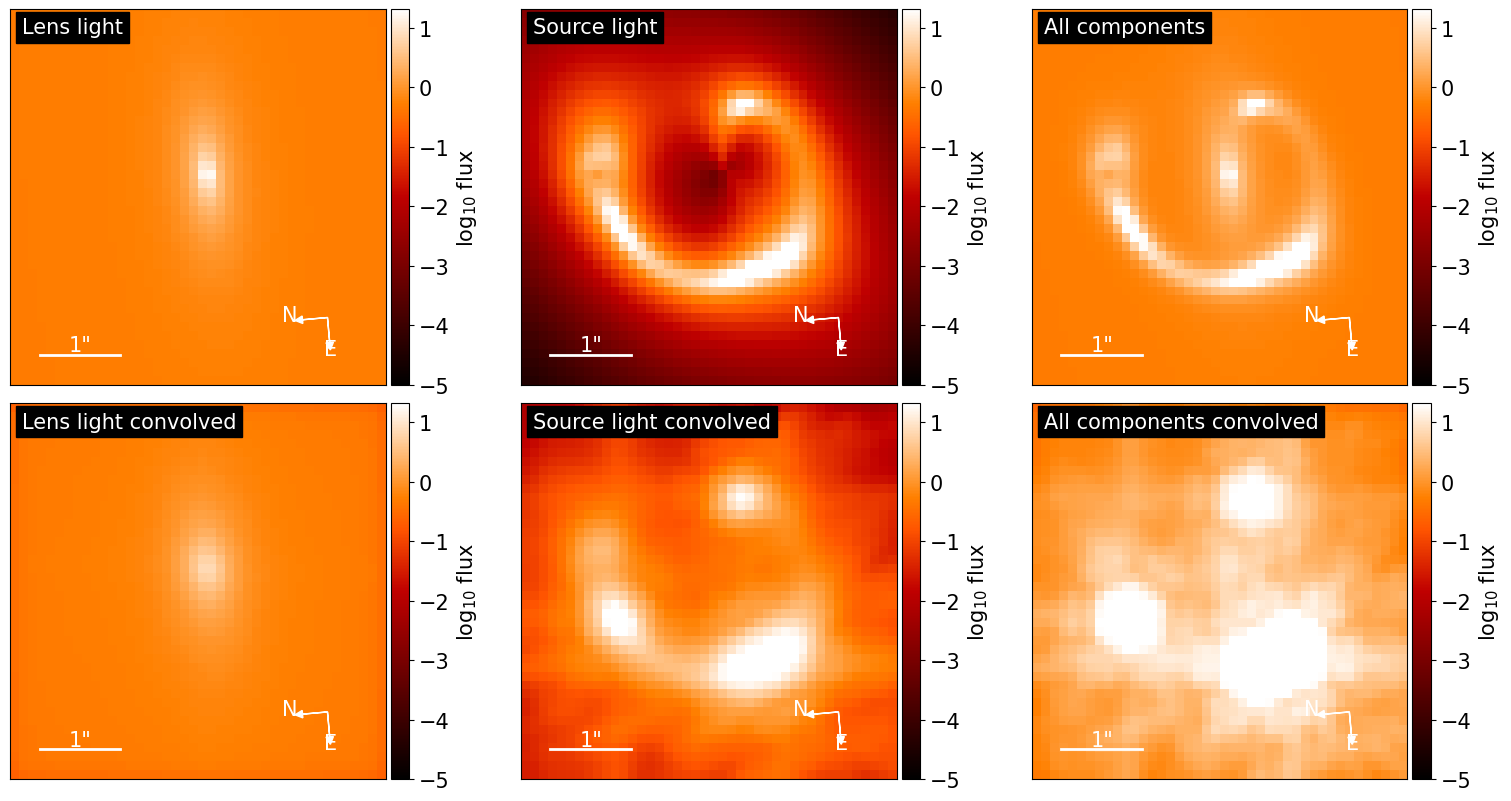

[{'theta_E': 1.165745089618974, 'gamma': 1.976210320156635, 'e1': 0.289161189436265, 'e2': 0.12716391346371525, 'center_x': -0.26007288904511977, 'center_y': -0.16468161922011704, 'a1_a': 0.0, 'delta_phi_m1': 0.0, 'a3_a': 0.0, 'delta_phi_m3': 0.0, 'a4_a': 0.0, 'delta_phi_m4': 0.0}, {'gamma1': 0.01676647256644915, 'gamma2': -0.0042091293300378415, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.12697861568484978, 'center_x': -0.45772316773287325, 'center_y': 1.4161648646028695}]
[{'amp': 8919.877384888568, 'R_sersic': 0.030974698841990073, 'n_sersic': 4.556154434566755, 'e1': 0.0896431537593779, 'e2': -0.316542793319995, 'center_x': -0.07680656907992223, 'center_y': 0.0762794036481657}]
[{'amp': 47.92456664960317, 'R_sersic': 0.5714828172720521, 'n_sersic': 4.29638386285579, 'e1': 0.4446558663205183, 'e2': 0.007933753785177439, 'center_x': -0.21962667834786062, 'center_y': -0.07706974273529751}, {'amp': 38.95031429349424}]


In [3]:
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
import matplotlib.pyplot as plt

multi_band_list = data.kwargs_data_joint['multi_band_list']
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="gist_heat",
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

param_class = fitting_sequence.param_class
print(param_class.num_param())
#print(chain_list)

for i in range(len(chain_list)):
    chain_plot.plot_chain_list(chain_list, i)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.data_plot(ax=axes[0,0])
modelPlot.model_plot(ax=axes[0,1])
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-4, v_max=4)
modelPlot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1)
modelPlot.magnification_plot(ax=axes[1, 2])
#f.tight_layout()
#f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
#plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light', source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved', source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', source_add=True, lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved', source_add=True, lens_light_add=True, point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()

#print(kwargs_result)
print(kwargs_result['kwargs_lens'])
print(kwargs_result['kwargs_source'])
print(kwargs_result['kwargs_lens_light'])

0.1931471805599453
-1.3435308526294862 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.3435308526294862


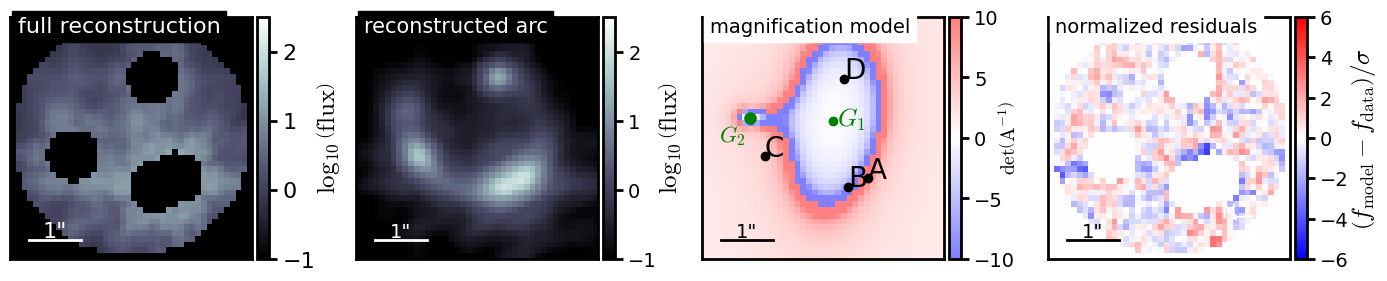

In [4]:
plt.rcParams['axes.linewidth'] = 2.
plt.rcParams['xtick.major.width'] = 2.
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'cm'
print((np.log(2) -0.5))

modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="bone",
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

fig = plt.figure(1)
fig.set_size_inches(14,4.5)

ax1 = plt.subplot(141)
modelPlot._arrow_size = 0
v_min = -1
v_max = v_min + 3.5
modelPlot.model_plot(ax=ax1,
                    v_min=v_min,v_max=v_max,text='full reconstruction',font_size=16,no_arrow=True)
im = ax1.images
cb = im[-1].colorbar 
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)


ax2 = plt.subplot(142)
modelPlot._arrow_size = 0
modelPlot.decomposition_plot(ax=ax2, text='reconstructed arc', unconvolved=False, 
                             source_add=True, v_min=v_min, v_max=v_max,cmap='bone',
                             font_size=14,no_arrow=True)
im = ax2.images
cb = im[-1].colorbar 
#cb.set_ticklabels(ticks,fontsize=16)
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)

ax3 = plt.subplot(143)
modelPlot._arrow_size = 0
v_min = -3
v_max = v_min + 3.
modelPlot.magnification_plot(ax=ax3, cmap='bwr', text='magnification model', font_size=14,
                            no_arrow=True)
im = ax3.images
cb = im[-1].colorbar 
cb.set_label(r'$\rm{det}\left(A^{-1}\right)$',labelpad=-12)

satx = kwargs_result['kwargs_lens'][0]['center_x']
saty = kwargs_result['kwargs_lens'][0]['center_y']
xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
pixel_width = data.coordinate_system.pixel_width
origin = [0,0]
x_ = xplot * pixel_width + origin[0]
y_ = yplot * pixel_width + origin[1]
ax3.plot(x_, y_, ".", color='g',markersize=12,alpha=1.)
ax3.text(x_+0.08, y_-0.1, r'$G_1$', fontsize=18, color='g')

satx = kwargs_result['kwargs_lens'][2]['center_x']
saty = kwargs_result['kwargs_lens'][2]['center_y']
xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
pixel_width = data.coordinate_system.pixel_width
origin = [0,0]
x_ = xplot * pixel_width + origin[0]
y_ = yplot * pixel_width + origin[1]
ax3.plot(x_, y_, ".", color='g',markersize=16,alpha=1.)
ax3.text(x_-0.6, y_-0.45, r'$G_2$', fontsize=16, color='g')


ax4 = plt.subplot(144)
modelPlot._arrow_size = 0
v_min = -3
v_max = v_min + 3.
modelPlot.normalized_residual_plot(ax=ax4,
                    cmap='bwr',font_size=14, text='normalized residuals')
im = ax4.images
cb = im[-1].colorbar 
cb.set_label(r'$\left(f_{\rm{model}}-f_{\rm{data}}\right)/\sigma$',labelpad=0,fontsize=18)

plt.subplots_adjust(wspace=-0.43, hspace=0.1)
plt.tight_layout()

#plt.savefig('../bmodel_figures/0414bmodel.pdf',bbox_inches='tight')

(0.20715635339966348, 0.519886875007946)


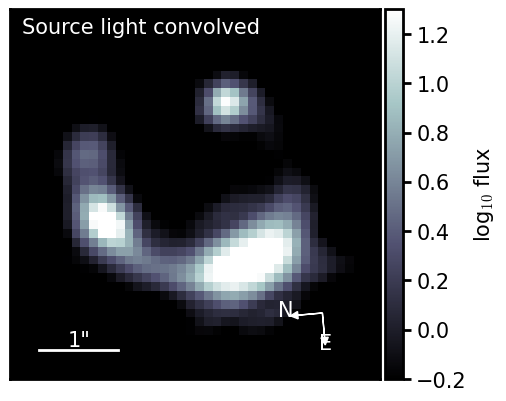

In [5]:
# chi^2 = -1.527 # without satellite 
fig = plt.figure(1)
ax = plt.subplot(111)
modelPlot._arrow_size = 0
v_min = -0.2
v_max = v_min + 1.5
modelPlot.decomposition_plot(ax=ax, text='Source light convolved', unconvolved=False, 
                             source_add=True, v_min=v_min, v_max=v_max,cmap='bone')

from lenstronomy.Util.param_util import ellipticity2phi_q
print(ellipticity2phi_q(kwargs_result['kwargs_lens'][0]['e1'], kwargs_result['kwargs_lens'][0]['e2']))

median:  -1763.101788171767
standard dev:  68.34538422500638


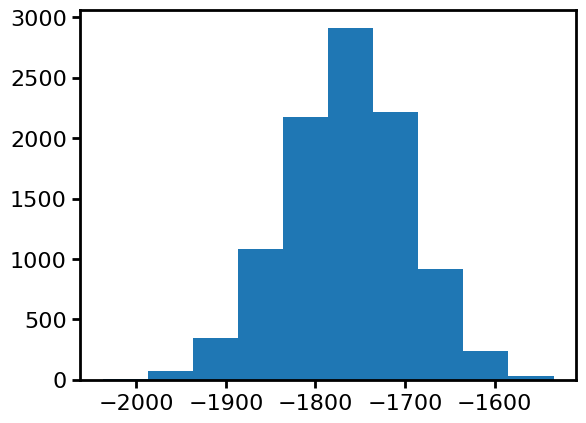

In [8]:
from lenstronomy.Util.class_creator import create_image_model 
import lenstronomy.Util.image_util as image_util

kwargs_data = data.kwargs_data
kwargs_psf = data.kwargs_psf
kwargs_numerics = data.kwargs_numerics 
image_model = create_image_model(kwargs_data, kwargs_psf, kwargs_numerics, kwargs_model)
likelihood_mask = data.likelihood_mask_imaging_weights
image_sim_no_noise = image_model.image(kwargs_result['kwargs_lens'], 
                              kwargs_result['kwargs_source'], 
                              kwargs_result['kwargs_lens_light'], 
                              kwargs_result['kwargs_ps'])
logL_list = []
model_error = image_model._error_map_model(
            kwargs_result['kwargs_lens'], kwargs_ps=kwargs_result['kwargs_ps'], kwargs_special=kwargs_result['kwargs_special']
        )


for i in range(0, 10000):
    poisson_noise = image_util.add_poisson(image_sim_no_noise, exp_time=59)
    poisson_noise = 0
    #noise_without_bkg = np.std(poisson_noise[inds_select])
    #background_rms_estimate = abs(image_noise - noise_without_bkg)
    #print(background_rms_estimate)
    bkg = image_util.add_background(image_sim_no_noise, sigma_bkd=0.66)
    noise_map = bkg + poisson_noise
    #plt.imshow(noise_map);plt.show();a=input('cont')
    image_sim = image_sim_no_noise + noise_map
    logL = image_model.Data.log_likelihood(image_sim_no_noise + noise_map, likelihood_mask, model_error)
    #print(logL)
    logL_list.append(logL)
    
max_logL = np.max(logL_list)
logL_list = np.array(logL_list) 
_ = plt.hist(logL_list)
print('median: ', np.median(logL_list))
print('standard dev: ', np.std(logL_list))